In [163]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

from tqdm import tqdm

import warnings
warnings.filterwarnings('once')

In [197]:
df=pd.read_csv('03_registrados_cod.csv', index_col=0)
df.head(2)

año  sensacion_termica  humedad     viento  registrados  mes_map  \
0    0           18.18125  80.5833  10.749882          654        0   
1    0           17.68695  69.6087  16.652113          670        0   

   estacion_map  dia_semana_map  clima_map  vacaciones_map  cod_SI  
0             0               0          1               0       0  
1             0               0          1               1       1

In [166]:
usuario = {'año':0, 'sensacion_termica':18.18125, 'humedad':80.5833, 'viento': 10.749882, 'mes_map': 0,  'estacion_map': 0 , 'dia_semana_map' :0, 'clima_map': 1, 'vacaciones_map':0 ,'cod_SI':0 }
df_usuario = pd.DataFrame(usuario, index = [0])
df_usuario

año  sensacion_termica  humedad     viento  mes_map  estacion_map  \
0    0           18.18125  80.5833  10.749882        0             0   

   dia_semana_map  clima_map  vacaciones_map  cod_SI  
0               0          1               0       0

In [167]:
bosque.predict(df_usuario)

array([1181.92051288])

In [198]:
#  separamos nuestro dataframe en X e y

X = df.drop(["registrados"], axis = 1)
y = df["registrados"]

In [199]:
# dividimos nuestros datos en train y test para poder evaluar la validez de nuestro modelo

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [200]:

param = {"max_depth": [9], 
        "max_features": [1,2,3,4],
        "min_samples_split": [6,7,10],
        "min_samples_leaf": [3,7,9]} 

In [201]:
gs_rf = GridSearchCV(
            estimator=RandomForestRegressor(), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1, # para que no nos printee ningún mensaje en pantalla
            return_train_score = True, # para que nos devuelva el valor de las métricas de set de datos de entrenamiento
            scoring="neg_mean_squared_error")

In [202]:
# ajustamos el modelo que acabamos de definir en el GridSearch

gs_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [9], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [3, 7, 9],
                         'min_samples_split': [6, 7, 10]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [203]:
# al igual que el decision tree podemos sacar cual es nuestro mejor bosque
# En este caso,  nuestro mejor bosque es aquel que esta formado por arboles de 6 de profundidad, usa 4 variables y que tiene  un min_samples_leaf y un min_samples_split de 10. 

bosque = gs_rf.best_estimator_
bosque

RandomForestRegressor(max_depth=9, max_features=4, min_samples_leaf=3,
                      min_samples_split=7)

In [204]:
# Calculamos sus métricas
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [177]:
# Con esta función calculamos las métricas y las convertimos en dataframe
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [205]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados
df_results = metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Random Forest")
df_results

MAE            MSE        RMSE        R2    set         modelo
0  432.841523  309979.050467  556.757623  0.856396   test  Random Forest
1  357.816413  232368.102633  482.045747  0.906795  train  Random Forest

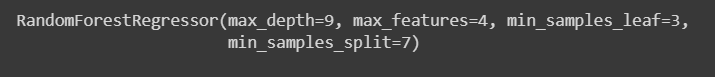
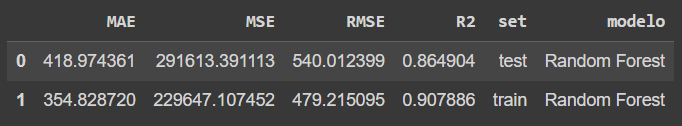

In [12]:
import pickle

In [100]:
with open("rf_86-90.pkl", "wb") as fp:
    pickle.dump(gs_rf, fp)

In [99]:
#with open("bosque_86-90.pkl", "wb") as fp:
    #pickle.dump(bosque, fp)